In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling
/home/saverio/Desktop/quantumcomp/ex/4. Time ind. Schroedinger Equation/time_ind_schroed_eq/harmonic_oscillator.f90
import os

In [2]:
# To do animations
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
! gfortran rg.f90 -Wall -llapack -frecursive -ffpe-summary='none'

! rm -rf ./data

In [16]:
colors = ['green','blue','crimson']

def plotgs(N,nit,nlambdas,k,compute=False):
    lambdas = np.linspace(0,3,nlambdas)
    
    # Name of the folder is pretty standard
    folder = 'N'+str(N)+'nit'+str(nit)
    
    # Execute program for every lam in lambdas
    if compute:
        for lam in lambdas:
            filename = str(round(lam,3))
            ! echo $N $nit $lam 1 $folder $filename | ./a.out >/dev/null
    
    y = []
    for i in range(len(lambdas)):
        filename = str(round(lambdas[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[-1]
        y.append(gs_en)
    plt.plot(lambdas,y,color=colors[k],label='Starting N: '+str(N))
        
def plotgs_convergence(frame_num):
    # You already need the data, you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)    
    y = []
    for i in range(len(x)):
        filename = str(round(x[i],3))+'.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[frame_num]
        y.append(gs_en)
    line.set_data((x,y))
    line.set_color('crimson')
    
    return line,

def plt_ev_MFA(nlam):
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    xx = 0
    y = []
    y1 = []
    y2 = []
    while(x[xx]<=2):
        y.append( -1 - (x[xx]**2)/4 )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    while(xx < nlam):
        y.append( -x[xx] )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    plt.plot(x,y,label='MFA',color='black',alpha=1)
    plt.plot(x,y1,ls='--',color='black',alpha=0.3)
    plt.plot(x,y2,ls='--',color='black',alpha=0.3)
    plt.plot(2, -2, marker='+',color='crimson', ms=10,mew=2)
    
def plt_ev_static(frame_num,k):
    # You already need the data, you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)
    for frame in range(nit):
        y = []
        for i in range(len(x)):
            filename = str(round(x[i],3))+'.csv'
            if(frame < len(np.genfromtxt('./data/'+folder+'/'+filename))):
                gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[frame]
            else:
                gs_en = np.genfromtxt('./data/'+folder+'/'+filename)[-1] 
            y.append(gs_en)
        if(frame < fshow):
            plt.plot(x,y,color=colors[k], alpha = .5 + float(frame)/(2*fshow) )
            
def plt_convergence(N,nit,k):
    # You already need the datam you can do that by running plotgs with the same parameters
    x = np.linspace(0,3,nlambdas)
    y = []
    for i in range(len(x)):
        filename = str(round(x[i],3))+'convergence.csv'
        gs_en = np.genfromtxt('./data/'+folder+'/'+filename)
        y.append(gs_en)
    plt.plot(x,y,color=colors[k])

In [5]:
Ns = [3,4,5]
nit = 60
nlambdas = 60

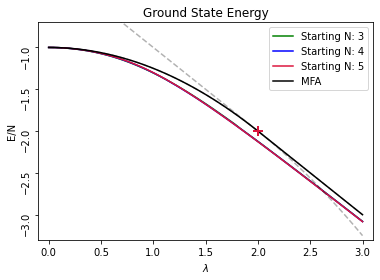

In [6]:
for k,N in enumerate(Ns):
    folder = 'N'+str(N)+'nit'+str(nit)
    plotgs(N,nit,nlambdas,k,compute=False)
plt_ev_MFA(nlambdas)
plt.xlim(-.1, 3.1)
plt.ylim(-3.3, -.7)
plt.title('Ground State Energy')
plt.xlabel(r'$\lambda$')
plt.yticks(rotation=90)
plt.ylabel('E/N')
plt.legend()
plt.grid(False)

plt.savefig('./imgs/RG_static.svg', format='svg')


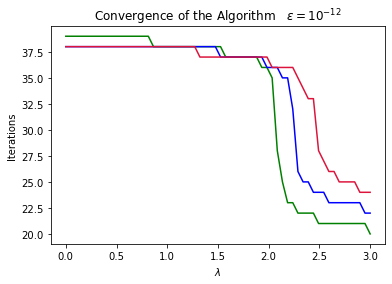

In [7]:
for k,N in enumerate(Ns):
    folder = 'N'+str(N)+'nit'+str(nit)
    plt_convergence(N,nit,k)
plt.title(r'Convergence of the Algorithm   $\epsilon=10^{-12}$')
plt.xlabel(r'$\lambda$')
plt.ylabel('Iterations')
plt.savefig('./imgs/convergence.svg', format='svg')


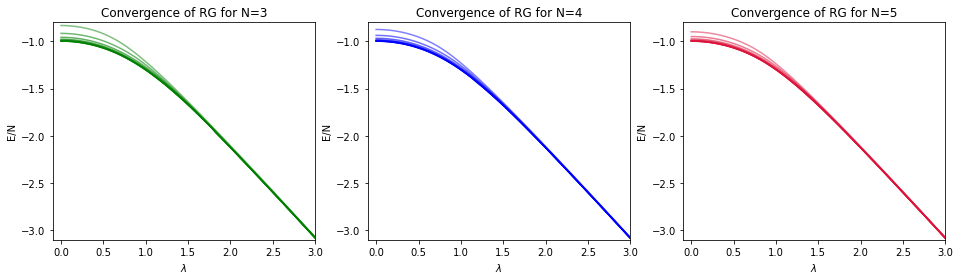

In [24]:
fshow = 8
plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

plt.subplot(1,3,1)
N = 3
folder = 'N'+str(N)+'nit'+str(nit)
plt_ev_static(nlambdas,0)
plt.xlim(-0.1,3)
plt.ylim(-3.1,-.8)
plt.title('Convergence of RG for N='+str(N))
plt.xlabel(r'$\lambda$')
plt.ylabel('E/N')

plt.subplot(1,3,2)
N = 4
folder = 'N'+str(N)+'nit'+str(nit)
plt_ev_static(nlambdas,1)
plt.xlim(-0.1,3)
plt.ylim(-3.1,-.8)
plt.title('Convergence of RG for N='+str(N))
plt.xlabel(r'$\lambda$')
plt.ylabel('E/N')

plt.subplot(1,3,3)
N = 5
folder = 'N'+str(N)+'nit'+str(nit)
plt_ev_static(nlambdas,2)
plt.xlim(-0.1,3)
plt.ylim(-3.1,-.8)
plt.title('Convergence of RG for N='+str(N))
plt.xlabel(r'$\lambda$')
plt.ylabel('E/N')

plt.savefig('./imgs/RG_static_anim.svg', format='svg')